In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
set_dir='/content/drive/MyDrive/BDS/TDP'
os.chdir(set_dir)
datasets_dir=os.path.abspath('./datasets')
datasets_dir
all_datasets=os.listdir(datasets_dir)
all_datasets.sort()
all_datasets

['C11.csv',
 'C13-1.csv',
 'C13-2.csv',
 'C14.csv',
 'C15.csv',
 'C16.csv',
 'C7-1.csv',
 'C7-2.csv',
 'C8.csv',
 'C9.csv']

In [3]:
all_datasets_path=[os.path.join(datasets_dir,f) for f in all_datasets]

In [4]:
datasets_df=[pd.read_csv(f) for f in all_datasets_path]
datasets_df[2]

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-99.331815,-79.731577,-58.670630,-100.000000,-60.086680,-100.000000,-55.796463,-100.000000,-42.668838,...,-97.870894,-74.582491,-80.624132,-93.696520,-25.000644,-97.691899,-60.473688,-100.000000,-100.0,-100.0
1,1,-99.331815,-79.731577,-49.950454,-100.000000,-55.630798,-100.000000,-55.647402,-100.000000,-65.232225,...,-97.870894,-74.582491,-80.624132,-93.696520,-25.016094,-97.691899,-61.226570,-100.000000,-100.0,-100.0
2,2,-99.331815,-79.731577,-50.072414,-100.000000,-55.576624,-100.000000,-55.511891,-100.000000,-65.681942,...,-97.870894,-74.582491,-80.624132,-93.696520,-25.016094,-97.691899,-59.595326,-100.000000,-100.0,-100.0
3,3,-99.331815,-79.731577,-50.011434,-100.000000,-55.671430,-100.000000,-55.525442,-100.000000,-63.681476,...,-97.870894,-74.582491,-80.624132,-93.696520,-25.016094,-97.691899,-61.634382,-100.000000,-100.0,-100.0
4,4,-99.331815,-79.731577,-50.011434,-100.000000,-55.671430,-100.000000,-55.633851,-100.000000,-64.255253,...,-97.870894,-74.582491,-80.624132,-93.696520,-23.996395,-97.691899,-61.634382,-100.000000,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,3916,-91.799544,-48.365851,24.887568,-14.089032,-22.313266,-24.747541,-22.298259,-24.896782,-10.878499,...,-92.344280,47.202876,-80.624132,-88.776383,-29.486288,-92.210159,37.479413,58.730163,-100.0,-100.0
3917,3917,-91.799544,-50.118056,-12.615291,-24.906576,-22.353897,-24.878689,-22.325361,-24.791926,-47.879352,...,-92.344280,-0.127312,-80.624132,-89.760411,-39.116776,-92.210159,-9.199278,-100.000000,-100.0,-100.0
3918,3918,-97.494305,-55.076426,-12.432350,-24.932800,-22.286179,-24.760656,-22.284708,-24.857461,-45.072497,...,-97.765194,-74.627425,-80.624132,-93.511124,-25.175744,-97.570420,-62.606854,-100.000000,-100.0,-100.0
3919,3919,-96.643888,-55.921461,-12.615291,-24.827903,-22.353897,-24.734426,-22.203401,-24.778819,-48.608203,...,-97.463193,-74.986894,-80.624132,-93.511124,-25.376593,-97.570420,-64.034193,-100.000000,-100.0,-100.0


In [5]:
##data set 13 and 7 have two files, we will concat two files as they are the data from individual experiment
#notice two files for C7 (index:6&7) and C13(index:1&2) run to failure exp
#concat the two data files
# datasets_df[6]=pd.concat([datasets_df[6],datasets_df[7]])
# datasets_df[1]=pd.concat([datasets_df[1],datasets_df[2]])
datasets=[]
for f in range(len(datasets_df)):
  if f==1 or f==6:
    datasets.append(pd.concat([datasets_df[f],datasets_df[f+1]]))
  else:
    datasets.append((datasets_df[f]))

##delete the C7-2 and C13_2 files:
ind=[2,7]
datasets=[datasets[i] for i in range(len(datasets)) if i not in ind]
print(len(datasets)) ## 8 datasets from 8 run-to-failure experiment

8


In [6]:
for i, test_df in enumerate(datasets):
  col_names=list(test_df.columns)
  for i in col_names:
    test_df[i].fillna(test_df[i].mean(), inplace=True)

In [7]:
datasets[2].isna().sum()

Timestamp    0
L_1          0
L_2          0
A_1          0
A_2          0
B_1          0
B_2          0
C_1          0
C_2          0
A_3          0
A_4          0
B_3          0
B_4          0
C_3          0
C_4          0
L_3          0
L_4          0
L_5          0
L_6          0
L_7          0
L_8          0
L_9          0
L_10         0
A_5          0
B_5          0
C_5          0
dtype: int64

In [8]:
def labeler(i):
  if i<= test_df.shape[0]//4:
    return 0
  elif i>test_df.shape[0]//4 and i <= 2*(test_df.shape[0]//4):
   return 1
  elif i > 2*(test_df.shape[0]//4) and i <= 3*(test_df.shape[0]//4):
    return 2
  else:
    return 3

In [9]:
for i, test_df in enumerate(datasets):
  test_df['machine_condition']=test_df.Timestamp.apply(labeler)
  col=test_df.pop('machine_condition')
  test_df.insert(1, 'machine_condition', col)

In [10]:
datasets[2].machine_condition

0        0
1        0
2        0
3        0
4        0
        ..
32843    3
32844    3
32845    3
32846    3
32847    3
Name: machine_condition, Length: 32848, dtype: int64

In [11]:
datasets[2].columns

Index(['Timestamp', 'machine_condition', 'L_1', 'L_2', 'A_1', 'A_2', 'B_1',
       'B_2', 'C_1', 'C_2', 'A_3', 'A_4', 'B_3', 'B_4', 'C_3', 'C_4', 'L_3',
       'L_4', 'L_5', 'L_6', 'L_7', 'L_8', 'L_9', 'L_10', 'A_5', 'B_5', 'C_5'],
      dtype='object')

In [12]:
all_datasets

['C11.csv',
 'C13-1.csv',
 'C13-2.csv',
 'C14.csv',
 'C15.csv',
 'C16.csv',
 'C7-1.csv',
 'C7-2.csv',
 'C8.csv',
 'C9.csv']

In [13]:
exp_names=[all_datasets[i] for i in range(len(all_datasets)) if i not in ind]

In [14]:
exp_names

['C11.csv',
 'C13-1.csv',
 'C14.csv',
 'C15.csv',
 'C16.csv',
 'C7-1.csv',
 'C8.csv',
 'C9.csv']

filter method of feature selection
per feature: build decision tree, predict the target, make prediction
rank feature on the basis of machine learning metric (we will use univariate roc values in this problem)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
def roc_scores():
  X_train, X_test, y_train, y_test=train_test_split(test_df.iloc[:,2:], test_df['machine_condition'], train_size=0.8, random_state=0)
  # univariate roc_auc
  df_roc_values=pd.DataFrame()
  roc_values = []
  for feature in X_test.columns:
    # if feature=='L_10':
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train[feature].to_frame(), y_train)
    y_pred_prob=dtc.predict_proba(X_test[feature].to_frame())

    #extracting roc values for multiclass output var
    for class_idx in range(y_pred_prob.shape[1]):
      class_roc_scores = []
      y_true_class = (y_test == class_idx).astype(int)  # Convert to binary classification
      y_pred_class = y_pred_prob[:, class_idx]
      y_true_class = np.array(y_true_class)
      y_pred_class = np.array(y_pred_class)
      class_score=roc_auc_score(y_true_class, y_pred_class)
      class_roc_scores.append(class_score)

      # print(f"ROC AUC Score for Class {class_idx}: {auc_score}")

    # Average ROC AUC score across all classes
    avg_score = sum(class_roc_scores) / len(class_roc_scores)
    roc_values.append(avg_score)
  roc_values=pd.Series(roc_values)
  return roc_values


In [16]:
df_roc=pd.DataFrame()
for i, test_df in enumerate(datasets):
  roc_series=roc_scores()
  df_roc=pd.concat([df_roc, roc_series], axis=1)
  # print(df_roc)
df_roc.index=datasets[0].iloc[:,2:].columns
df_roc.columns=exp_names
df_roc


,C11.csv,C13-1.csv,C14.csv,C15.csv,C16.csv,C7-1.csv,C8.csv,C9.csv
L_1,0.989719,0.989258,0.992529,0.993361,0.992478,0.993859,0.998396,0.997589
L_2,0.800622,0.835711,0.781165,0.931253,0.842233,0.970074,0.734379,0.979015
A_1,0.716381,0.629530,0.557617,0.554749,0.874162,0.726023,0.821197,0.670207
A_2,0.805171,0.790779,0.687565,0.858519,0.840800,0.680064,0.653761,0.872354
B_1,0.621604,0.805771,0.687223,0.638526,0.605960,0.747906,0.559297,0.729529
B_2,0.612124,0.766042,0.689019,0.862530,0.840122,0.748510,0.635029,0.870956
C_1,0.744775,0.547736,0.660716,0.546365,0.879170,0.803775,0.555264,0.599349
C_2,0.715891,0.768802,0.690027,0.662041,0.707794,0.768130,0.649536,0.875641
A_3,0.692415,0.642763,0.533338,0.774243,0.858725,0.721848,0.825094,0.825135
A_4,0.808485,0.707533,0.686555,0.836862,0.817181,0.691861,0.612961,0.809332


In [17]:
trans=df_roc.T
trans

,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,A_4,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
C11.csv,0.989719,0.800622,0.716381,0.805171,0.621604,0.612124,0.744775,0.715891,0.692415,0.808485,...,0.980403,0.816665,0.887565,0.963003,0.730728,0.982077,0.666120,0.625770,0.948750,0.624316
C13-1.csv,0.989258,0.835711,0.629530,0.790779,0.805771,0.766042,0.547736,0.768802,0.642763,0.707533,...,0.887741,0.985232,0.774679,0.635377,0.548002,0.911593,0.677480,0.670073,0.665349,0.659305
C14.csv,0.992529,0.781165,0.557617,0.687565,0.687223,0.689019,0.660716,0.690027,0.533338,0.686555,...,0.988066,0.894792,0.896809,0.685654,0.540606,0.904820,0.693794,0.831570,0.807473,0.852070
C15.csv,0.993361,0.931253,0.554749,0.858519,0.638526,0.862530,0.546365,0.662041,0.774243,0.836862,...,0.842338,0.634486,0.986360,0.649579,0.549271,0.902103,0.573459,0.571417,0.627396,0.593993
C16.csv,0.992478,0.842233,0.874162,0.840800,0.605960,0.840122,0.879170,0.707794,0.858725,0.817181,...,0.950300,0.795837,0.942829,0.653904,0.537704,0.926012,0.575221,0.704839,0.627433,0.703330
C7-1.csv,0.993859,0.970074,0.726023,0.680064,0.747906,0.748510,0.803775,0.768130,0.721848,0.691861,...,0.945784,0.827988,0.940416,0.902857,0.719217,0.938766,0.668816,0.660306,0.699817,0.616984
C8.csv,0.998396,0.734379,0.821197,0.653761,0.559297,0.635029,0.555264,0.649536,0.825094,0.612961,...,0.922964,0.922964,0.908478,0.961494,0.785930,0.977601,0.761675,0.680408,0.642824,0.650438
C9.csv,0.997589,0.979015,0.670207,0.872354,0.729529,0.870956,0.599349,0.875641,0.825135,0.809332,...,0.902833,0.535818,0.812843,0.907273,0.672174,0.956820,0.529352,0.706921,0.811170,0.707183


In [18]:
trans.mean().sort_values(ascending=False)

L_1     0.993399
L_9     0.937474
L_3     0.933457
L_4     0.927554
L_6     0.893747
L_2     0.859306
L_5     0.801723
L_7     0.794893
A_2     0.773626
B_2     0.753042
A_4     0.746346
B_3     0.744062
B_4     0.738602
C_3     0.734704
A_3     0.734195
C_2     0.729733
B_5     0.728777
C_4     0.726105
A_1     0.693733
A_5     0.681413
C_5     0.675952
B_1     0.674477
C_1     0.667144
L_10    0.643240
L_8     0.635454
dtype: float64

auto_encode and model_testing

In [19]:
#normalizing the data
#normalized data
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
for i, data in enumerate(datasets):
  data.iloc[:,2:]=mms.fit_transform(data.iloc[:,2:])

In [20]:
#which component to use??
#A, B and C represents one component each. L represent the other 5 components. 1+2, 3+6, 4+5, 7+8 and 9+10.

datasets_autoencoder=[]
for i,data in enumerate(datasets):
  data=data.loc[:,['Timestamp','L_1','L_2','L_3','L_6']]
  datasets_autoencoder.append(data)

In [21]:
datasets_autoencoder[0].head(5)

,Timestamp,L_1,L_2,L_3,L_6
0,0,0.425582,0.368012,0.399861,0.171834
1,1,0.509200,0.472050,0.479215,0.200696
2,2,0.670086,0.442236,0.638155,0.162838
3,3,0.050073,0.144928,0.060192,0.005194
4,4,0.022553,0.259731,0.024108,0.084498


In [29]:
from keras.models import Model
from keras.layers import Input, Dense


# Define the Autoencoder architecture
input_dim = 4  # Number of input features
encoding_dim = 5  # Number of neurons in the encoder layers

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

In [30]:
training_data = np.vstack([data.iloc[:int(0.05 * len(data)),1:] for k,data in enumerate(datasets_autoencoder)])
print(len(training_data))
# Compile and train the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(training_data, training_data, epochs=50, batch_size=32)

# Calculate reconstruction errors for train_data
reconstructed_data = autoencoder.predict(training_data)
reconstruction_errors = np.mean(np.square(training_data - reconstructed_data), axis=1)

11418
Epoch 1/50
357/357 [==============================] - 1s 2ms/step - loss: 0.1351
Epoch 2/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0497
Epoch 3/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0275
Epoch 4/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0181
Epoch 5/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 6/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 7/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 8/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 9/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 10/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 11/50
357/357 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 12/50
357/357 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 13/50
357/357

In [ ]:
autoencoder.save("anomaly_detection_model_dir")

In [31]:
# Set a threshold for anomaly detection (e.g., 99th percentile)
threshold = np.percentile(reconstruction_errors, 99.99)
print('threshold for anomaly detection:', threshold)

threshold for anomaly detection: 0.05920559391846467


Testing model for anomaly detection in all datasets

In [ ]:
# # Set a threshold for anomaly detection (e.g., 99th percentile)
# threshold = np.percentile(reconstruction_errors, 99.99)
# print('threshold for anomaly detection:', threshold)
for i, data_set in enumerate(datasets_autoencoder):
  print('=====================dataset',exp_names[i],'========================')
  # Detect anomalies in new_data
  new_data_reconstructed = autoencoder.predict(data_set.iloc[:,1:].values)
  new_data_errors = np.mean(np.square(data_set.iloc[:,1:].values - new_data_reconstructed), axis=1)
  print(len(new_data_errors)==data_set.shape[0])
  print(data_set.shape[0])
  anomaly_timestamp=[]
  for j in range(len(new_data_errors)):
    if new_data_errors[j] > threshold:
      anomaly_timestamp.append(j)

  if len(anomaly_timestamp)<=1:
    continue
  else:
    for k in range(len(anomaly_timestamp)-1):
      if anomaly_timestamp[k+1]-anomaly_timestamp[k]<=10:
       print('anomaly detected at Timestamp:', anomaly_timestamp[k])
  # plt.plot(range(len(data_set.index)), new_data_errors)
  # plt.show()


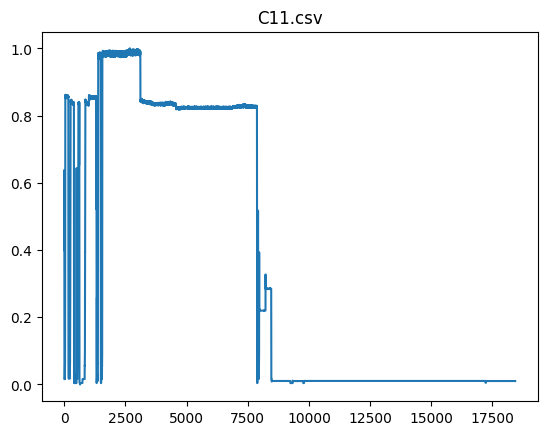

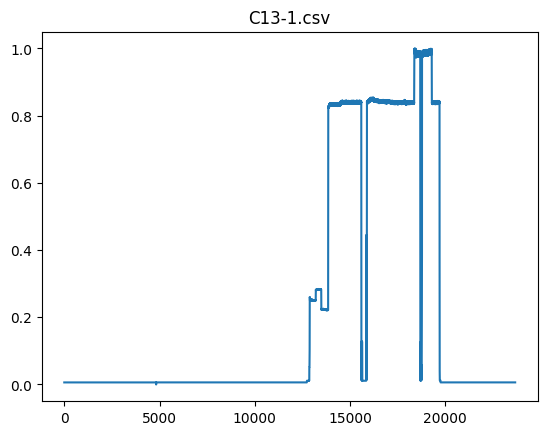

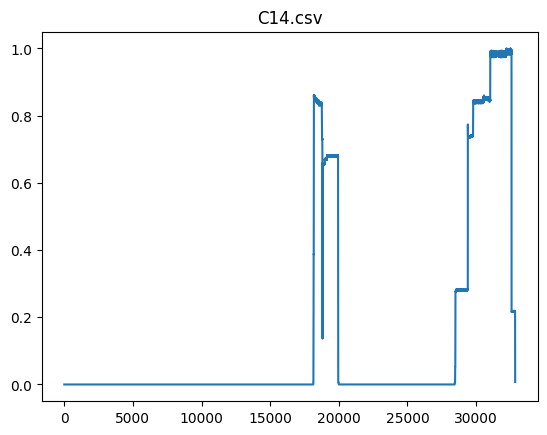

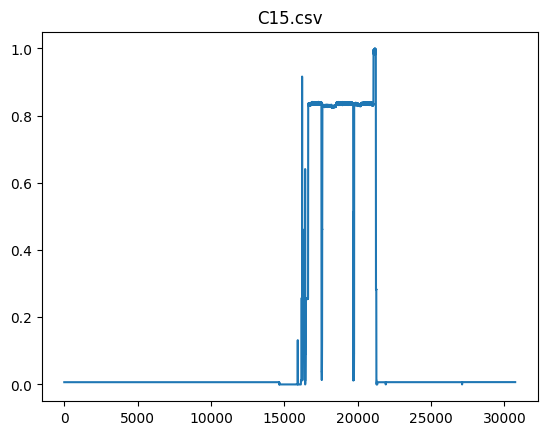

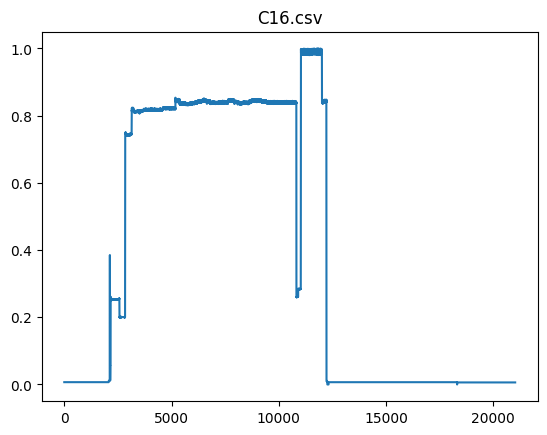

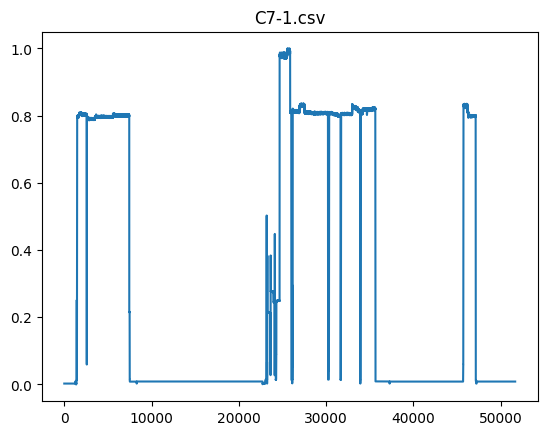

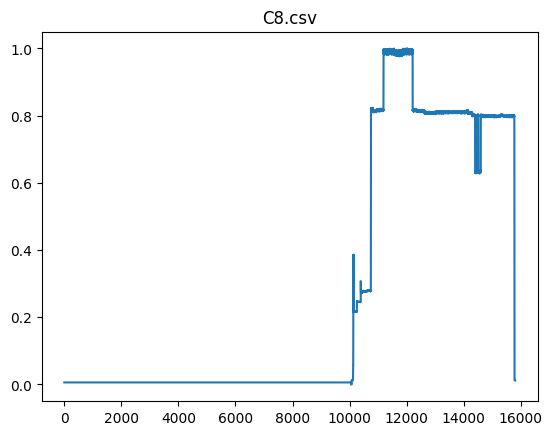

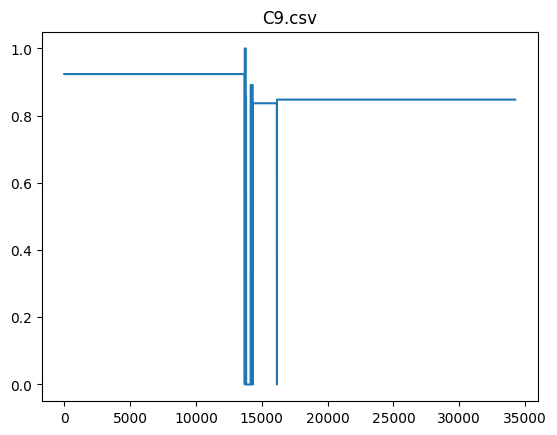

In [ ]:
for i, test_df in enumerate(datasets):
  for j in test_df.columns:
    if j=='L_3':
      plt.plot(range(len(test_df.index)), test_df['L_3'])
      plt.title(exp_names[i])
      plt.show()